#### 0. Import the data

In [132]:
import pandas as pd

data = pd.read_csv("ndtv_data_final.csv", usecols=lambda column: column not in ['Unnamed: 0'])
data.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


#### 1. Create dummy variables

In [135]:
import numpy as np

df_w_dummies = pd.get_dummies(
    data,
    columns=[
        'Touchscreen',
        'Processor',
        'Operating system',
        'Wi-Fi',
        'Bluetooth',
        'GPS',
        'Number of SIMs',
        '3G',
        '4G/ LTE'
        ],
    drop_first=True
    )

# Get the dummy columns where the type is 'bool'
dummy_columns = df_w_dummies.select_dtypes(include='bool').columns
# Convert type from 'bool' to 'int'
df_w_dummies[dummy_columns] = df_w_dummies[dummy_columns].astype(int)

#### 2. Convert the price columns to US dollars. Apply the natural logarithm to the price column.

In [138]:
df_w_dummies["Price"] = df_w_dummies["Price"] * 0.021
df_w_dummies['Price_LOG'] = df_w_dummies['Price'].apply(lambda x: np.log(x))
df_w_dummies

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,RAM (MB),Internal storage (GB),Rear camera,...,Operating system_Windows,Operating system_iOS,Wi-Fi_Yes,Bluetooth_Yes,GPS_Yes,Number of SIMs_2,Number of SIMs_3,3G_Yes,4G/ LTE_Yes,Price_LOG
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1440,3120,12000,256.000,48.0,...,0,0,1,1,1,1,0,1,1,7.122026
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1080,2400,6000,64.000,64.0,...,0,0,1,1,1,1,0,1,1,6.376691
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1242,2688,4000,64.000,12.0,...,0,1,1,1,1,1,0,1,1,7.716416
3,iPhone 11,Apple,iPhone 11,3110,6.10,828,1792,4000,64.000,12.0,...,0,1,1,1,1,1,0,1,1,7.186069
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1080,2340,6000,128.000,12.0,...,0,0,1,1,1,0,0,0,0,6.956345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,480,800,512,8.000,5.0,...,0,0,1,1,1,1,0,1,0,3.999649
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,480,854,1000,8.000,8.0,...,0,0,1,1,1,1,0,1,0,4.122932
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,480,854,512,4.000,5.0,...,0,0,1,1,0,1,0,1,0,4.142801
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,480,800,256,0.512,2.0,...,0,0,1,1,1,1,0,1,0,3.960013


#### 3. Produce a summary statistics using describe().T

In [141]:
df_w_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery capacity (mAh),1359.0,2938.489330,873.514133,1010.000000,2300.000000,3000.00000,3500.000000,6000.000000
Screen size (inches),1359.0,5.291310,0.671357,2.400000,5.000000,5.20000,5.700000,7.300000
Resolution x,1359.0,811.543046,270.707271,240.000000,720.000000,720.00000,1080.000000,2160.000000
Resolution y,1359.0,1490.777778,557.780120,320.000000,1280.000000,1280.00000,1920.000000,3840.000000
RAM (MB),1359.0,2488.777778,1664.440386,64.000000,1000.000000,2000.00000,3000.000000,12000.000000
Internal storage (GB),1359.0,30.654864,36.950241,0.064000,8.000000,16.00000,32.000000,512.000000
Rear camera,1359.0,12.070199,8.948337,0.000000,8.000000,12.20000,13.000000,108.000000
Front camera,1359.0,7.037969,6.295448,0.000000,2.000000,5.00000,8.000000,48.000000
Price,1359.0,240.782338,291.007439,10.374000,100.033500,146.97900,251.979000,3674.790000
Touchscreen_Yes,1359.0,0.987491,0.111184,0.000000,1.000000,1.00000,1.000000,1.000000


#### 4. Assign $(y, X)$

In [144]:
import numpy as np

y = df_w_dummies["Price_LOG"]
X = df_w_dummies.drop(columns=['Price', 'Price_LOG', 'Name', 'Brand', 'Model'])

#### 5. Split the dataset into training and testing

In [147]:
from sklearn.model_selection import train_test_split
import warnings

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 6. Construct a stepwise procedure and find the best model based on BIC criteria. Print the list of feature for the best model.

In [150]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

# Fit the Linear Regression model
lr = LinearRegression()

# Stepwise selection
sfs = SequentialFeatureSelector(lr, k_features="best", forward=True, scoring='neg_mean_squared_error', cv=5)
sfs = sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_names_)

# Print selected features
print("Features for the best model: ", selected_features)

Features for the best model:  ['Resolution x', 'Resolution y', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Processor_6', 'Processor_8', 'Operating system_Windows', 'Operating system_iOS', 'GPS_Yes', 'Number of SIMs_2', 'Number of SIMs_3', '3G_Yes']


#### 7. Estimate the linear model using the selected features in statsmodels. Print the results.

In [154]:
import statsmodels.api as sm

selected_features = list(sfs.k_feature_names_)
X_selected_train = X_train[selected_features]
X_selected_test = X_test[selected_features]

X_selected_train = sm.add_constant(X_selected_train)
model = sm.OLS(y_train, X_selected_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_LOG   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.04e-202
Time:                        17:50:48   Log-Likelihood:                -593.21
No. Observations:                 951   AIC:                             1216.
Df Residuals:                     936   BIC:                             1289.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### 8. Print and review the top 10 models based on BIC.

In [157]:
model.aic, model.bic, model.rsquared, model.rsquared_adj

(1216.4171060146232,
 1289.2798169528041,
 0.6499752006377962,
 0.6447397869721223)

#### 9. Plot (scatter) the BIC score by number of featrues.

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Function to calculate BIC for a given set of features
def calculate_bic(features):
    X_subset = sm.add_constant(X_train[list(features)])
    model = sm.OLS(y_train, X_subset).fit()
    return model.bic

# Get all selected feature subsets from SequentialFeatureSelector
feature_combinations = list(itertools.combinations(sfs.k_feature_names_, len(sfs.k_feature_names_)))

# Calculate BIC for each combination
bic_scores = []
for features in feature_combinations:
    bic = calculate_bic(features)
    bic_scores.append((features, bic))

# Sort by BIC and get the top 10 models
bic_scores.sort(key=lambda x: x[1])
top_10_models = bic_scores[:10]

# Display the top 10 models
for idx, (features, bic) in enumerate(top_10_models):
    print(f"Model {idx+1}: Features: {features}, BIC: {bic}")

#### 10. Calculate BIC, AIC, RMSE, R-squared, Adjusted R-squared on training and testing datasets.

#### 11. Compute the log price of the average phone in two ways:
- compute the average log price directly from the log price column;

- compute the average value of the features and predict the log price



#### 12. Leverage the following result to compute the predicted average price. If $y=log(Y)$ and $y~N(\mu, \sigma)$, then $E[Y]=e^{\mu+\frac{1}{2}{\sigma}^2}$

#### 13. Compute the percentage increase in the price due to having the GPS feature versus not assuming average value for all other features. How does it compare with the GPS_Yes coefficient?

#### 14. Compute the percentage increase in the price due to having the iOS system versus not assuming average value for all other features (hint: need to set Windows iOS system dummy to zero). How does it compare with the Operating System_iOS coefficient? Are the numbers close? If so, why? If not, why?

Result:

#### 2. Construct a stepwise procedure using 'sklearn.linear_model.LinearRegression' and 'mlxtend.feature_selection.SequentialFeatureSelector'. Find the best model based on BIC criteria. Print the list of feature for the best model.

In [116]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

# Load data
yX = pd.read_csv("synthetic-polynomial.csv")
y, X = yX[["y"]], yX[["x001", "x002", "x003", "x004", "x005", "x006", "x007", "x008", "x009"]]

# Fit the Linear Regression model
lr = LinearRegression()

# Stepwise selection
sfs = SequentialFeatureSelector(lr, k_features="best", forward=True, scoring='neg_mean_squared_error', cv=5)
sfs = sfs.fit(X, y)
selected_features = list(sfs.k_feature_names_)

# Print selected features
print("Features for the best model: ", selected_features)

Features for the best model:  ['x001', 'x002', 'x008']


#### 3. Estimate and print the best modeling using statsmodels.

In [119]:
import statsmodels.api as sm

# Fit the model using selected features
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)  # Add intercept

model = sm.OLS(y, X_selected).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1866.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:42:46   Log-Likelihood:                -1377.7
No. Observations:                1000   AIC:                             2763.
Df Residuals:                     996   BIC:                             2783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0049      0.051     39.040      0.0

## Question 10: Best subset selection for linear regression

#### 0. Load the synthetic polynomial dataset

In [123]:
import pandas as pd

# Load data
yX = pd.read_csv("synthetic-polynomial.csv")
y, X = yX[["y"]], yX[["x001", "x002", "x003", "x004", "x005", "x006", "x007", "x008", "x009"]]
n, p = X.shape

#### 1. Split the Data into training and testing

In [180]:
from sklearn.model_selection import train_test_split

# Split data between train and test
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#### 2. Perform the (variation) best subset selection

In [77]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Perform (variation) best subset selection
results = []

for k in range(0, p + 1): # p: number of parameters 
    
    if k == 0:
        
        # Training estimation/evaluation
        X_train_subset = sm.add_constant([1] * len(y_train))
        model = sm.OLS(y_train, X_train_subset).fit()
        aic, bic, rsquared, rsquared_adj = model.aic, model.bic, model.rsquared, model.rsquared_adj
        yp_train = model.predict(X_train_subset)
        rmse_train = np.sqrt(mean_squared_error(y_train, yp_train))
        
        # Testing evaluation
        X_test_subset = sm.add_constant([1] * len(y_test))
        yp_test = model.predict(X_test_subset)
        rmse_test = np.sqrt(mean_squared_error(y_test, yp_test))
        
        # Collect results
        results.append((k, '1', aic, bic, rsquared, rsquared_adj, rmse_train, rmse_test))
        
    else:

        # Make a combination of k numbers in a set: range(p)
        # combo: (0, 1, 2, ...)
        for combo in itertools.combinations(range(p), k):
            
            # Training estimation/evaluation
            cols = X.columns[list(combo)] # Get X columns of the combo
            X_train_subset = X_train[cols] # Arrange a subset
            
            X_train_subset = sm.add_constant(X_train_subset)
            model = sm.OLS(y_train, X_train_subset).fit()
            aic, bic, rsquared, rsquared_adj = model.aic, model.bic, model.rsquared, model.rsquared_adj
            yp_train = model.predict(X_train_subset)
            rmse_train = np.sqrt(mean_squared_error(y_train, yp_train))
            
            # Testing evaluation
            X_test_subset = X_test[cols]
            X_test_subset = sm.add_constant(X_test_subset)
            yp_test = model.predict(X_test_subset)
            rmse_test = np.sqrt(mean_squared_error(y_test, yp_test))
            results.append((k, '+'.join(cols), aic, bic, rsquared, rsquared_adj, rmse_train, rmse_test))

# Convert results into dataframe
# Adj R-squared: Adjusted R-squared
# RMSE: Root mean squared error
results = pd.DataFrame(results, columns=['Subset Size', 'Variables','AIC', 'BIC', 'R-squared', 'Adj R-squared', 'RMSE Training', 'RMSE Testing'])
results

,Subset Size,Variables,AIC,BIC,R-squared,Adj R-squared,RMSE Training,RMSE Testing
0,0,1,3727.310946,3731.995558,-4.440892e-16,-4.440892e-16,2.482785,2.415376
1,1,x001,3181.426932,3190.796156,4.958367e-01,4.952049e-01,1.762888,1.551988
2,1,x002,3354.592896,3363.962119,3.739954e-01,3.732109e-01,1.964391,1.960457
3,1,x003,3295.703255,3305.072478,4.184217e-01,4.176929e-01,1.893403,1.670697
4,1,x004,3375.057618,3384.426841,3.577751e-01,3.569703e-01,1.989677,1.933472
...,...,...,...,...,...,...,...,...
507,8,x001+x002+x003+x005+x006+x007+x008+x009,2246.045280,2288.206785,8.461200e-01,8.445637e-01,0.973935,0.904448
508,8,x001+x002+x004+x005+x006+x007+x008+x009,2246.205183,2288.366688,8.460892e-01,8.445326e-01,0.974033,0.907379
509,8,x001+x003+x004+x005+x006+x007+x008+x009,2256.703191,2298.864696,8.440562e-01,8.424790e-01,0.980445,0.901548
510,8,x002+x003+x004+x005+x006+x007+x008+x009,2266.726836,2308.888342,8.420900e-01,8.404930e-01,0.986606,0.914671


#### 3. Produce a table with the top results by adjusted R-squared.

In [21]:
# Return 5 rows with biggest adjusted R-squared
results.nlargest(5, columns=["Adj R-squared"])

,Subset Size,Variables,AIC,BIC,R-squared,Adj R-squared,RMSE Training,RMSE Testing
51,3,x001+x002+x008,2238.774158,2257.512605,0.845594,0.845012,0.975598,0.899698
137,4,x001+x002+x004+x006,2240.070678,2263.493736,0.845730,0.844954,0.975169,0.900720
139,4,x001+x002+x004+x008,2240.185631,2263.608690,0.845708,0.844931,0.975239,0.900067
49,3,x001+x002+x006,2239.253735,2257.992182,0.845502,0.844919,0.975890,0.900030
150,4,x001+x002+x008+x009,2240.291695,2263.714754,0.845687,0.844911,0.975304,0.902172


#### 4. Produce a table with top results by BIC.

In [25]:
# Note: Smaller BIC is better
results.nsmallest(5, columns=["BIC"])

,Subset Size,Variables,AIC,BIC,R-squared,Adj R-squared,RMSE Training,RMSE Testing
10,2,x001+x002,2241.769805,2255.823640,0.844627,0.844237,0.978649,0.904285
51,3,x001+x002+x008,2238.774158,2257.512605,0.845594,0.845012,0.975598,0.899698
49,3,x001+x002+x006,2239.253735,2257.992182,0.845502,0.844919,0.975890,0.900030
47,3,x001+x002+x004,2240.193990,2258.932437,0.845320,0.844737,0.976464,0.900394
52,3,x001+x002+x009,2243.474445,2262.212892,0.844684,0.844099,0.978468,0.905693


#### 5. Produce a table with the top results by AIC.

In [27]:
results.nsmallest(5, columns=["AIC"])

,Subset Size,Variables,AIC,BIC,R-squared,Adj R-squared,RMSE Training,RMSE Testing
51,3,x001+x002+x008,2238.774158,2257.512605,0.845594,0.845012,0.975598,0.899698
49,3,x001+x002+x006,2239.253735,2257.992182,0.845502,0.844919,0.975890,0.900030
137,4,x001+x002+x004+x006,2240.070678,2263.493736,0.845730,0.844954,0.975169,0.900720
139,4,x001+x002+x004+x008,2240.185631,2263.608690,0.845708,0.844931,0.975239,0.900067
47,3,x001+x002+x004,2240.193990,2258.932437,0.845320,0.844737,0.976464,0.900394


#### 6. Produce a table with the top results by R-squared.

In [88]:
results.nlargest(5, columns=["R-squared"])

,Subset Size,Variables,AIC,BIC,R-squared,Adj R-squared,RMSE Training,RMSE Testing
511,9,x001+x002+x003+x004+x005+x006+x007+x008+x009,2247.818391,2294.664508,0.846164,0.844411,0.973797,0.905776
502,8,x001+x002+x003+x004+x005+x006+x007+x008,2245.822645,2287.984151,0.846163,0.844607,0.973800,0.905984
503,8,x001+x002+x003+x004+x005+x006+x007+x009,2245.831765,2287.993270,0.846161,0.844605,0.973806,0.905485
466,7,x001+x002+x003+x004+x005+x006+x007,2243.835939,2281.312833,0.846160,0.844801,0.973808,0.905694
504,8,x001+x002+x003+x004+x005+x006+x008+x009,2245.871842,2288.033348,0.846153,0.844597,0.973830,0.906458


#### 7. Plot the AIC, BIC, R-squared, Adj. R-squared, RMSE in-sample and RMSE out-of-sample for each model across on models sizes.

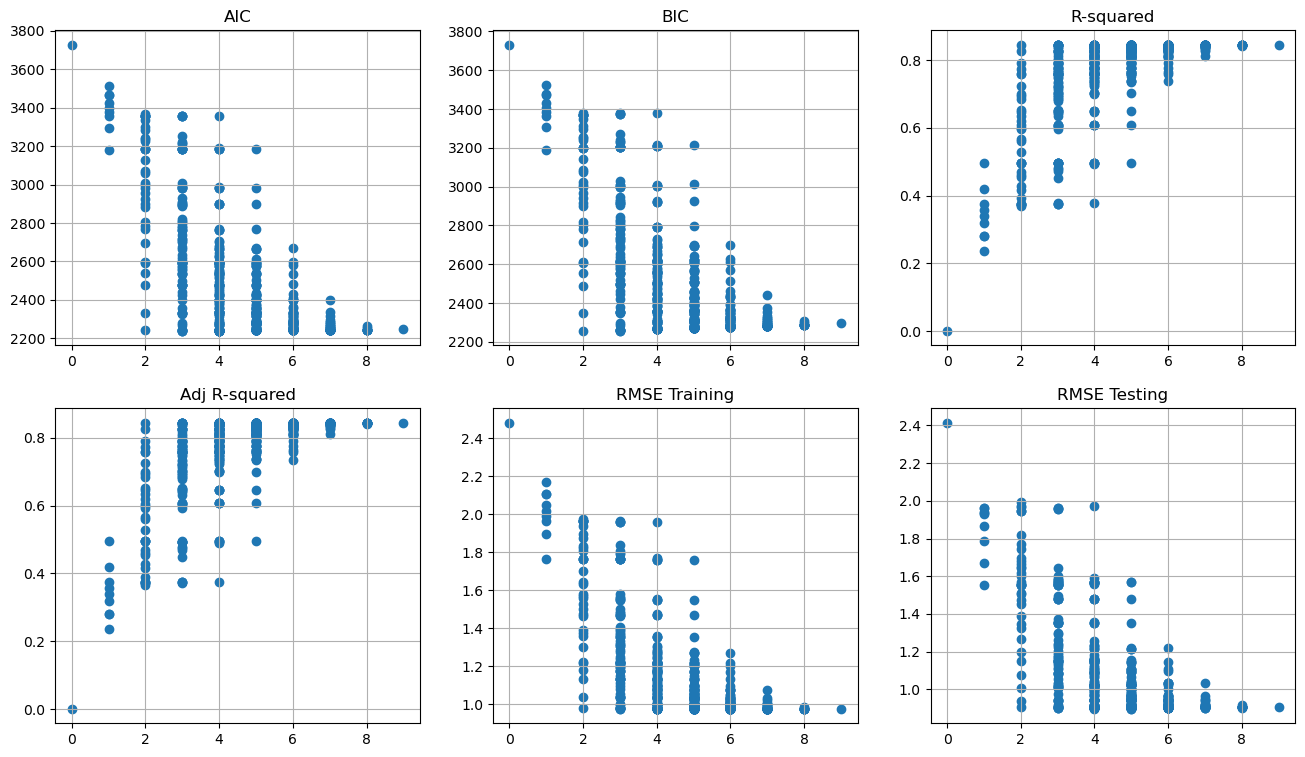

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,9))

k = 0

gofs = ["AIC", "BIC", "R-squared", "Adj R-squared", "RMSE Training", "RMSE Testing"]

for i in range(0, 2):
    for j in range(0, 3):
        gof = gofs[k]
        ax[i, j].scatter(results['Subset Size'], results[gof])
        ax[i, j].title.set_text(gof)
        ax[i, j].grid(True)
        k += 1

# Best subset
plt.show()